In [2]:
#importo las librerias genericas y leo el data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Mall_Customers.csv")

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
# 2.a
#¿Cuáles son los nombres que reciben las columnas en el conjunto de datos?
# Estos son los nombres de las columnas
# CustomerID, Gende,r Age, Annual Income (k$), Spending Score (1-100)

In [7]:
# 2.b ¿Cuáles son los tipos de datos asociados a las columnas?
# Tenemos Intergers y 1 Objeto

In [13]:
# 2.c ¿Cuál es la cantidad total de registros que tiene este conjunto de datos?
# Un total de 200

In [15]:
# 3 Una vez identificada la columna “Gender”, es necesario que cambies el tipo de dato de esta columna al tipo “int” 
#utilizando la instrucción vista en la libreta de la tercer semana titulada “Mejorando los modelos”.

df['Gender'] = df['Gender'].replace('Male',1).replace('Female',0)

In [19]:
#verifico que este cambiado:
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [ ]:
# 4. Asigna la columna “CustomerID” como el índice de los datos.

In [18]:
df.set_index('CustomerID', drop=True, append=False, inplace=False, verify_integrity=False)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [20]:
# 5. Realiza una transformación de los datos a valores flotantes.
df = df.astype(np.float64)
df = df.fillna(method ='ffill') 

In [21]:
# Verifico:
df.dtypes

CustomerID                float64
Gender                    float64
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [35]:
#6. Utilizando las columnas “Spending Score” y “Annual Income”, realiza un agrupamiento de datos con el 
#algoritmo “K-Means” con K = 3. Nota: En caso de ser necesario, guíate siguiendo el 
#ejemplo encontrado en la libreta “Clustering y K-Means”.

In [40]:
# Defino df con las dos variables que quiero
df = df[["Spending Score (1-100)", "Annual Income (k$)"]]

In [42]:
# Normalizo la informacion para poder utilizar el algoritmo de clustering:

from sklearn.preprocessing import StandardScaler,normalize
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
normalized_df = normalize(scaled_df) 
normalized_df = pd.DataFrame(normalized_df,columns=df.columns) 

In [43]:
normalized_df.head()

,Spending Score (1-100),Annual Income (k$)
0,-0.242563,-0.970136
1,0.566575,-0.824010
2,-0.710221,-0.703978
3,0.521823,-0.853054
4,-0.231681,-0.972792


In [44]:
from sklearn.cluster import KMeans

In [48]:
n_clusters = 3
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.363554,-0.836063
1,-0.914915,-0.226099
2,0.169294,-0.911011
3,-0.897225,-0.276430
4,-0.373792,-0.831518


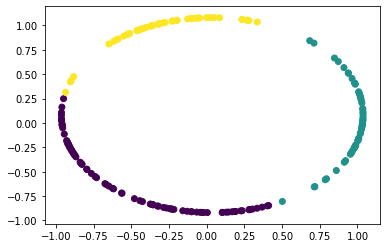

In [50]:
plt.scatter(X_principal['P1'], X_principal['P2'], c = km.predict(normalized_df));

In [51]:
#7. Utilizando el método del codo (elbow), determina el número óptimo de Clusters y repite el paso 6 
#modificando el número de Clusters (parámetro K) por el valor obtenido.

In [52]:
Sum_of_squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_df)
    Sum_of_squared_distances.append(km.inertia_)

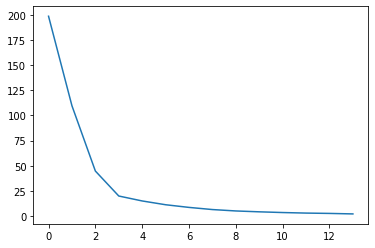

In [53]:
plt.plot(Sum_of_squared_distances);

In [54]:
# Por lo que veo el cambio sustancial se ve con 3 clustes, que es lo que ya se utilizo, pero como es algo
# ambiguio, voy a realizar el paso 6 con 4 clusters

In [56]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df);

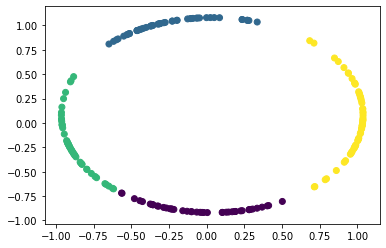

In [60]:
# 8. Realiza la gráfica de dispersión con los clusters definidos.
plt.scatter(X_principal['P1'], X_principal['P2'], c = km.predict(normalized_df));

In [61]:
df["c"] = km.predict(normalized_df)
df.head()

,Spending Score (1-100),Annual Income (k$),c
0,39.0,15.0,0
1,81.0,15.0,2
2,6.0,16.0,0
3,77.0,16.0,2
4,40.0,17.0,0


In [58]:
import seaborn as sns

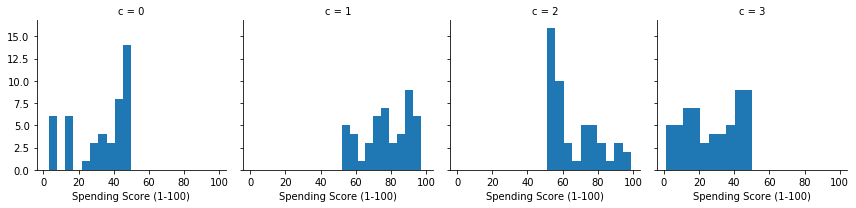

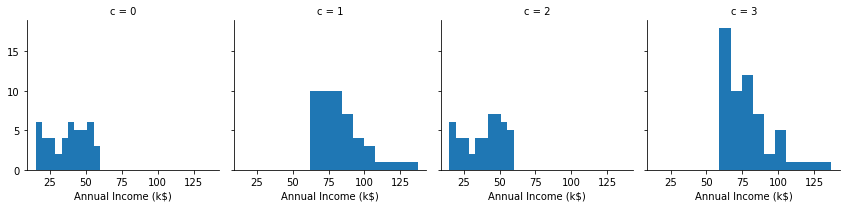

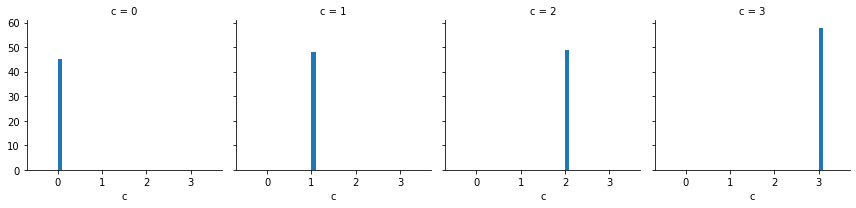

In [62]:
for col in df:
    grid= sns.FacetGrid(df, col='c')
    grid.map(plt.hist, col)

9. Analiza la gráfica de dispersión obtenida, identifica y describe el perfil de cliente por cluster. Incluye tus respuestas en la misma libreta en una celda del tipo “markdown”.

Analizando los clusters sobre todo el c=0 y c02, se puede observar que las personas que tienen un ingreso anual
entre 50 y 75 mil son las que tienen el mejor spending score